# Logistic Regression
Author: Geraldine Klarenberg

Based on the Google Machine Learning Crash Course and the Good Audience blog (https://blog.goodaudience.com/classifying-flowers-using-logistic-regression-in-sci-kit-learn-38262416e4c6)

## Probabilities

Sometimes problems require probability as an output (as opposed to the estimate or a value of something). Probabilities are always represented as values between 0 and 1 - essentially 0 is 0% chance of something happening (or not), and 1 is 100% of something happening (or not).
You can use probabilities in this way, or apply them in calculations. For instance, the probability of a dog barking in the middle of the night is
```text
p(dog | night)
```
("the probability of a dog barking given that it is night")

If the probability is given as 0.05, we can calculate that an owner will be woken up by a barking dog approximately 18 times in a year:
```text
p(dog | night) * number of nights = number of times woken up
0.05 * 365 ~= 18
```
Now, this approach brings some constraints to our calculations. For instance, we have to make sure all results are *always* between zero and one, we cannot allow negative values.

Also, these types of calculations are typically applied to situations where the feature values are categorical. E.g. the probability of an email being "spam" or "not spam". Drawing a straight line through the results, as we learned in an earlier lesson, would not yield good results. In the plot below, 1 could represent "spam" and 0 "not spam", and the data points are the number of "spam" and "not spam" emails people have in their inboxes. 

![An image illustrating showing a linear regression line through categorical data](../nb-images/binary-graph.png)

## Logistic regression to the rescue 

Instead of linear regression, we are better off using a so-called logistic regression model. This better represents the data, and always ensures values are between 0 and 1. A logistic regression model produces a sigmoid as a result. 

![Image showing a sigmoid plot](../nb-images/SigmoidFunction.png)

The function to get a plot like this is:

$$ y = \frac{1}{1 + e^{-z}} $$

In ML terms, if *z* is the output of the linear layer of a model that you're training, *y* will give the value, a probability, between 0 and 1. So you use

$$y' = \frac{1}{1 + e^{-(z)}}$$

where
* *y'* is the output of the logistic regression model (the probability)
* *z* is the linear function that we discussed in previous lessons: $ b + w_1x_1 + w_2x_2 + w_3x_3 + \ldots + w_nx_n $

Remember: the *w* values are the model's learned weights, *b* is the bias and *x* are the feature values. So we are basically still dealing with the same function as before!

** It's that easy! **

Using these ML labels, you can interpret the sigmoid plot as:

![Image showing the sigmoid with y and z labels](../nb-images/LogisticRegressionOutput.svg)

### A few (math) notes 

**NB** In math terms this type of transformation is also referred to as using a "link function". To find more information online about this topic, search for "logit link function". Also note that a *logistic* function is different from *logarithmic* function! Don't confuse the two.

**NB2** Sometimes *z* is referred to as the *log-odds* because if you take the inverse of the sigmoid, i.e. you separate out *z*, you get $$z = ln(\frac{y}{1-y})$$

In regular words: the natural log of the odds. And odds are defined as the probability of label 1 (e.g. "dog barks", *y*) divided by the probability of label 0 (e.g. "dog does not bark", *y-1*).

So let's say a dog barks 6 out of 10 times. The probability of the dog barking is 0.6, the probability of the dog not barking is 0.4, and the odds that the dog wil bark is 1.5. **Yes**, odds can be larger than 1, but probabilities cannot! 

## An example 

We have a logistic regression model with three features that learned the following bias and weights:
* *b* = 1
* *w1* = 2
* *w2* = -1
* *w3* = 5

We then have a situation with the following feature values:
* *x1* = 0
* *x2* =10
* *x3* = 2

The *log-odds* (*z*) is then:
```text
(1) + (2)(0) + (-1)(10) + (5)(2) = 1
```
And the regression prediction will be:
$$y' = \frac{1}{1 + e^{-(1)}} = 0.731$$

Looking at the plot, this is where our result sits:

![Image of the sigmoid with the result (0.731) highlighted](../nb-images/LogisticRegressionOutput0.731.svg)

## Loss 
Remember, the loss function for linear regression is squared loss. For a logistic function it is **Log Loss**:

$$\text{Log Loss} = \sum_{(x,y)\in D} -y\log(y') - (1 - y)\log(1 - y')$$

with
* $(x,y)\in D$ is the dataset (D) with many labeled (x-y paired) examples
* *y* is the label in the labeled example. Every value of *y* **must** be 0 or 1.
* *y'* is the predicted value given the set of features in x. The predicted value is between 0 and 1.

**NB** The Log Loss equation is the negative log of the likelihood function (assuming a Bernouilli distribution of *y*), so minimizing the loss function, gives you a Maximum Likelihood Estimate (MLE).

## Regularization
Since logistic regression is asymptotic, regularization is very important. Without it, loss would continue driving to 0 in high dimensions. This means the model would completely overfit, trying to drive loss to 0 on all examples - and never get there. This would drive the weights to +infinity or -infinity. So somehow, we need to specify when to stop (or dampen complexity). We do this with
* $L_{2}$
 regularization; or
* Early stopping - limiting the training steps or learning rate

## Example
Let's try and build a logistic regression model based on the 'iris' data set we looked at earlier. First make sure the necessary libraries and data is loaded.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

In [26]:
iris = load_iris()

Now create the dataframes with the data we have available to do predictions: sepal length and width, and petal length and width.

In [40]:
X = iris.data
y = iris.target

In [28]:
df = pd.DataFrame(X, 
                  columns = ['sepal_length(cm)',
                            'sepal_width(cm)',
                            'petal_length(cm)',
                            'petal_width(cm)'])

Add the numeric species identifier, the class label, to the dataframe:

In [29]:
df['species_id'] = y

In [30]:
df.head()

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm),species_id
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


To make this a little clearer, let's map the actual names of the species against the species ID's. First create a dictionary with ID's as keys, and assign species names as values.

In [31]:
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

Use this key to create a new column called 'species_name'.

In [32]:
df['species_name'] = df['species_id'].map(species_map)

In [33]:
df.head()

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm),species_id,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In this example, we want to find out if an iris is a Setosa or not (two classes). How could we determine this, based on the information we have? Let's explore the characteristics of each species. We'll use a mask to filter species, and the function ".describe".

In [34]:
setosa_mask = df['species_name'] == 'setosa'
df[setosa_mask].describe()

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm),species_id
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,5.00600,3.418000,1.464000,0.24400,0.0
std,0.35249,0.381024,0.173511,0.10721,0.0
min,4.30000,2.300000,1.000000,0.10000,0.0
25%,4.80000,3.125000,1.400000,0.20000,0.0
50%,5.00000,3.400000,1.500000,0.20000,0.0
75%,5.20000,3.675000,1.575000,0.30000,0.0
max,5.80000,4.400000,1.900000,0.60000,0.0


In [35]:
virginica_mask = df['species_name'] == 'virginica'
df[virginica_mask].describe()

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm),species_id
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,6.58800,2.974000,5.552000,2.02600,2.0
std,0.63588,0.322497,0.551895,0.27465,0.0
min,4.90000,2.200000,4.500000,1.40000,2.0
25%,6.22500,2.800000,5.100000,1.80000,2.0
50%,6.50000,3.000000,5.550000,2.00000,2.0
75%,6.90000,3.175000,5.875000,2.30000,2.0
max,7.90000,3.800000,6.900000,2.50000,2.0


In [36]:
versicolor_mask = df['species_name'] == 'versicolor'
df[versicolor_mask].describe()

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm),species_id
count,50.000000,50.000000,50.000000,50.000000,50.0
mean,5.936000,2.770000,4.260000,1.326000,1.0
std,0.516171,0.313798,0.469911,0.197753,0.0
min,4.900000,2.000000,3.000000,1.000000,1.0
25%,5.600000,2.525000,4.000000,1.200000,1.0
50%,5.900000,2.800000,4.350000,1.300000,1.0
75%,6.300000,3.000000,4.600000,1.500000,1.0
max,7.000000,3.400000,5.100000,1.800000,1.0


Based on this information, we see that the sepal width is larger for Setosa, on average. The sepal length and petal width are smaller. Let's see if we can use the latter two as a basis for separating species. We'll make a scatter plot of these two, coloring the points by species.

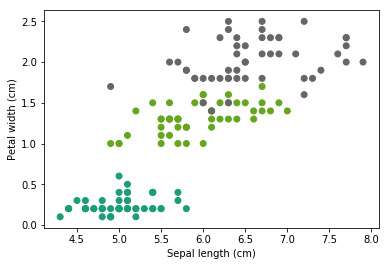

In [37]:
plt.scatter(X[:,0], X[:,3], c = y, cmap = 'Dark2')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal width (cm)')
plt.show()

It looks like this might work! Setosa is the group of points in the bottom left corner. However, we currently have 3 classes, and we only want 2: "Setosa" and "not Setosa". Let's create new target features, and divide the data into training and testing sets.

First extract only the sepal length and petal width data.

In [42]:
X  = np.c_[X[:,0], X[:,3]]

Now create a vector with binary values for 'Sesota' and 'not Sesota'. Because we know for this dataset that the first 50 entries are Sesota, we add a vector with 50 values of 1, the rest 0s.

In [44]:
y = []
for i in range(len(X)):
    if i < 50:
        y.append(1)
    else:
        y.append(0)

In [49]:
y = np.array(y)

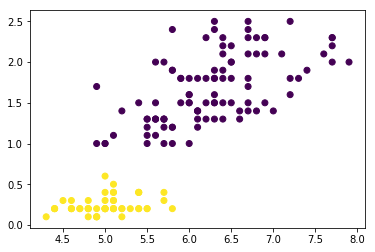

In [50]:
plt.scatter(X[:,0], X[:,1], c = y)

Now let's create train and test sets. Take 80% of the data as training data, and 20% as test data. We have 150 data points, so that is 120 vs 30

In [59]:
random = np.random.permutation(len(X))
x_train = X[random][30:]
x_test = X[random][:30]

In [63]:
y_train= y[random][30:]
y_test = y[random][:30]

In [64]:
x_train.shape, y_train.shape

((120, 2), (120,))

In [65]:
x_test.shape, y_test.shape

((30, 2), (30,))

Sklearn has a library to implement logistic regression. We need to take the following steps:
* Import the library
* Fit the model with the feature variables and target classes of the training data set
* Find the weights and the bias.

In [66]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
W = log_reg.coef_
b = log_reg.intercept_
W, b

(array([[ 0.42296081, -4.24883969]]), array([0.87589704]))

Check the probabilities for the training set. Remember: this will be the probability that the data point represents a Sesota iris (based on sepal lenght and petal width).

In [68]:
proba_sesota = log_reg.predict_proba(x_train)

In [69]:
proba_sesota[0:10]

array([[0.99877169, 0.00122831],
       [0.90349868, 0.09650132],
       [0.14699771, 0.85300229],
       [0.77870551, 0.22129449],
       [0.99871622, 0.00128378],
       [0.90349868, 0.09650132],
       [0.09382328, 0.90617672],
       [0.16977288, 0.83022712],
       [0.99673851, 0.00326149],
       [0.99747253, 0.00252747]])

Let's visualize these results in a scatter plot. We will plot the original binary ("Sesota" vs "not Sesota") plot and add a regression line that represents the separation between the classes.

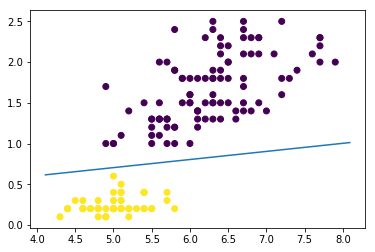

In [73]:
plt.scatter(X[:,0], X[:,1], c = y)
ax = plt.gca()
xvals = np.array(ax.get_xlim())
yvals = -(xvals * W[0][0] + b) / W[0][1]
plt.plot(xvals, yvals)
plt.show()

That's a good separation! Let's apply our regression model to the test data and see how it performs.

In [74]:
predictions = log_reg.predict(x_test)

In [75]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0])

In [76]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0])

It's a perfect prediction! Note that this is rarely (if ever) the case for most data sets. In addition, when it comes to training and testing data, K-fold cross-validation is best practice.